# 02 — Análise Exploratória de Dados (EDA)
Este notebook utiliza os dados brutos coletados da API CoinGecko para realizar análises exploratórias, fundamentais para entender o comportamento das criptomoedas e embasar as etapas seguintes do projeto.

**Principais etapas abordadas:**
- Carregamento e verificação do dataset bruto
- Estatísticas descritivas das variáveis
- Análise da quantidade de registros por ativo
- Visualização da evolução temporal dos preços e volumes
- Distribuição dos preços (histogramas)
- Análise de correlação entre criptomoedas
- Identificação de padrões, outliers e possíveis problemas nos dados

A análise exploratória é essencial para garantir a qualidade dos dados, identificar tendências e selecionar as variáveis mais relevantes para a modelagem.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

df = pd.read_csv("../data/raw/prices_raw.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'])

df.head()


,timestamp,price,volume,market_cap,coin
0,2025-09-30 17:01:29.261,112843.613034,5.532786e+10,2.248248e+12,bitcoin
1,2025-09-30 18:02:02.079,113343.475429,5.558492e+10,2.259015e+12,bitcoin
2,2025-09-30 19:02:18.018,113644.471873,5.554536e+10,2.264727e+12,bitcoin
3,2025-09-30 20:02:25.069,114491.910339,5.674079e+10,2.278936e+12,bitcoin
4,2025-09-30 21:02:37.088,114618.579149,5.744427e+10,2.284540e+12,bitcoin


## Estatísticas Descritivas
Apresenta medidas de tendência central e dispersão das variáveis principais, como preço, volume e market cap, auxiliando na compreensão da escala e variabilidade dos dados.

In [22]:
df.describe()

,timestamp,price,volume,market_cap
count,14410,14410.000000,1.441000e+04,1.441000e+04
mean,2025-10-30 17:02:16.097712896,10980.309559,1.181612e+10,2.672727e+11
min,2025-09-30 17:00:52.609000,0.046575,3.102897e+06,1.530351e+08
25%,2025-10-15 17:01:32.358249984,0.757206,6.836333e+07,6.455732e+08
50%,2025-10-30 17:01:36.745999872,1.969206,2.884035e+08,1.457052e+09
75%,2025-11-14 17:04:52.518749952,184.179135,6.736494e+09,1.007608e+11
max,2025-11-29 16:40:33,126079.887029,2.009687e+11,2.507867e+12
std,NaN,31855.642211,2.474466e+10,6.329954e+11


## Quantidade de Registros por Criptomoeda
Verifica se todas as criptomoedas possuem dados suficientes e identifica possíveis inconsistências ou ativos com poucos registros.

In [23]:
df['coin'].value_counts()

coin
bitcoin              1441
ethereum             1441
solana               1441
kamino               1441
ethena               1441
pendle               1441
lido-dao             1441
aerodrome-finance    1441
virtual-protocol     1441
chainlink            1441
Name: count, dtype: int64

## Evolução Temporal dos Preços
Visualiza a série temporal dos preços para cada criptomoeda, permitindo identificar tendências, ciclos e comportamentos distintos entre os ativos analisados.

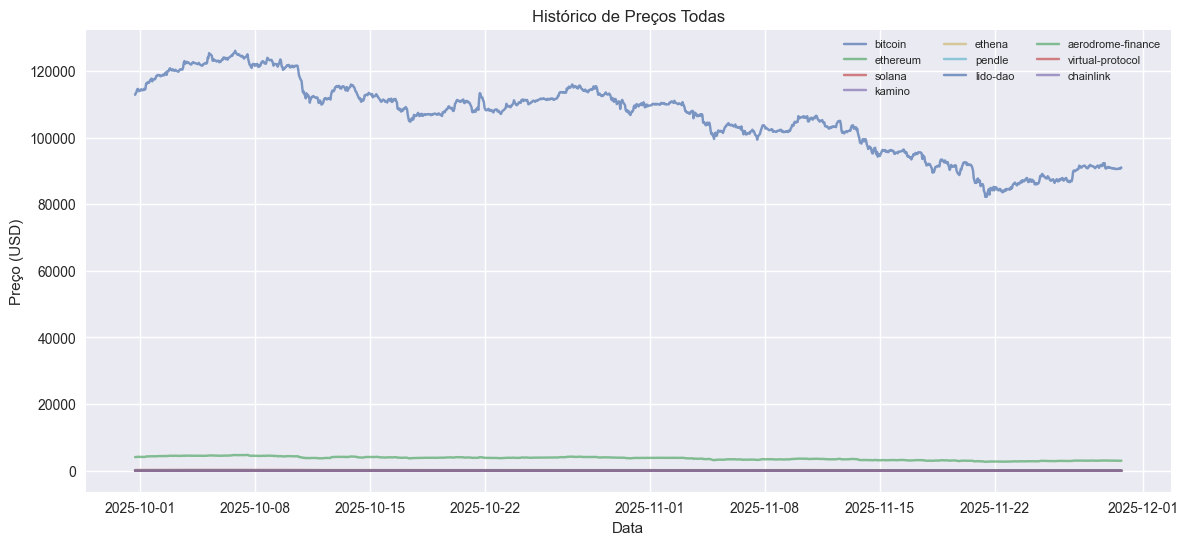

In [24]:
plt.figure(figsize=(14,6))

for coin in df['coin'].unique():
    subset = df[df['coin']==coin]
    plt.plot(subset['timestamp'], subset['price'], alpha=0.7, label=coin)

plt.title("Histórico de Preços Todas")
plt.xlabel("Data")
plt.ylabel("Preço (USD)")
plt.legend(ncol=3, fontsize=8)
plt.grid(True)
plt.show()

## Visualização Individual — Exemplo de Criptomoeda
Exemplo de análise detalhada do histórico de preços de uma criptomoeda específica, destacando padrões e variações ao longo do tempo.

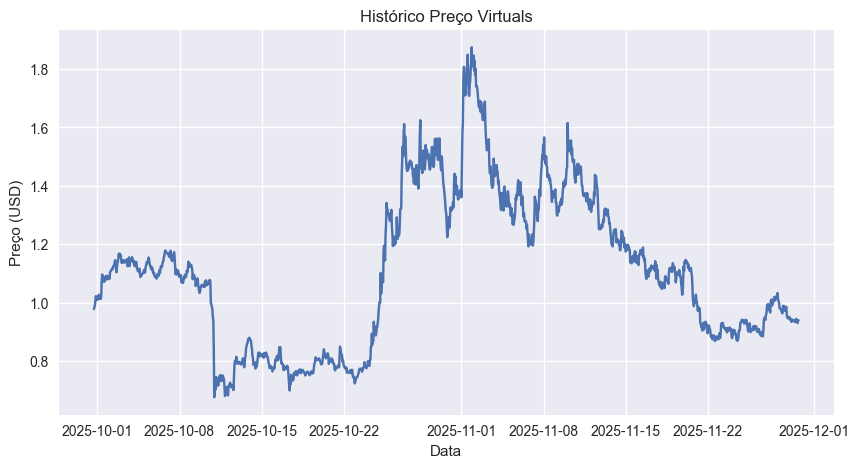

In [25]:
btc = df[df['coin']=='virtual-protocol']

plt.figure(figsize=(10,5))
plt.plot(btc['timestamp'], btc['price'])
plt.title("Histórico Preço Virtuals")
plt.xlabel("Data")
plt.ylabel("Preço (USD)")
plt.grid(True)
plt.show()

## Analisando o Volume Negociado
Avaliação do volume negociado ao longo do tempo para cada criptomoeda, importante para entender liquidez, risco e interesse do mercado nos ativos.

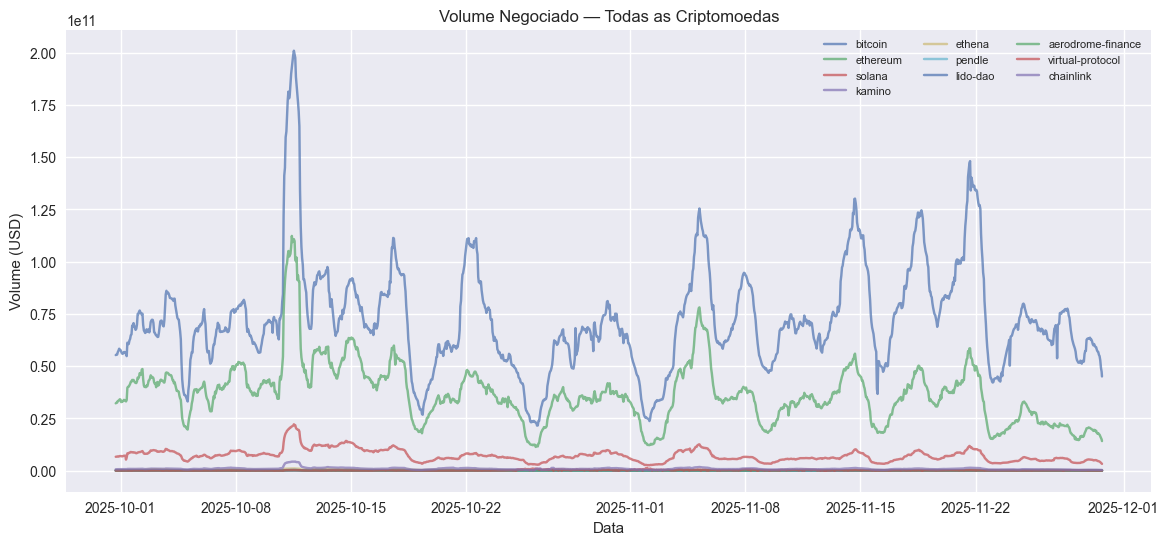

In [26]:
plt.figure(figsize=(14,6))

for coin in df['coin'].unique():
    subset = df[df['coin']==coin]
    plt.plot(subset['timestamp'], subset['volume'], alpha=0.7, label=coin)

plt.title("Volume Negociado — Todas as Criptomoedas")
plt.xlabel("Data")
plt.ylabel("Volume (USD)")
plt.legend(ncol=3, fontsize=8)
plt.grid(True)
plt.show()

## Distribuição dos Preços (Histograma)
Visualização da distribuição dos preços das criptomoedas, permitindo identificar assimetrias, outliers e padrões de comportamento dos ativos.

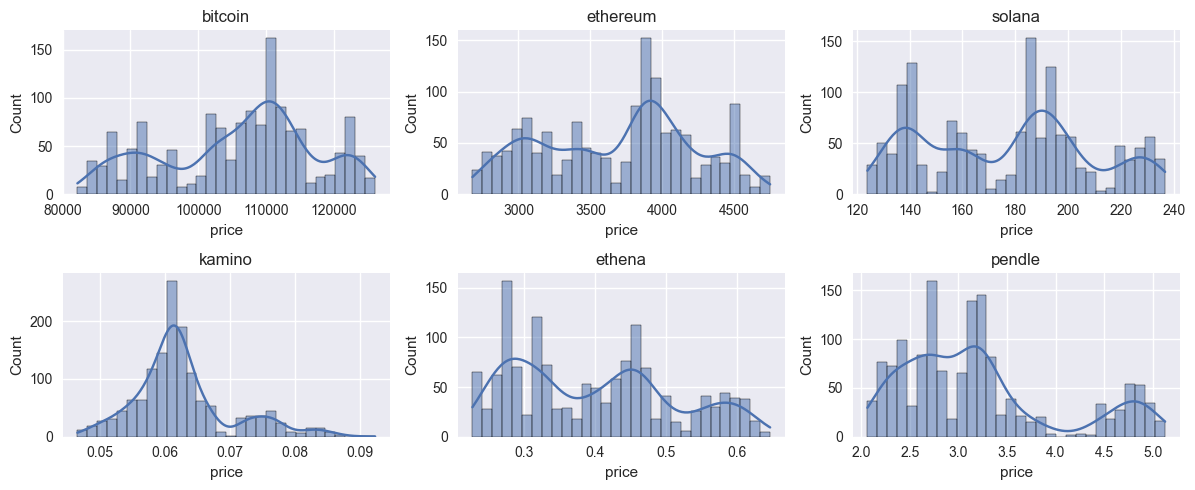

In [27]:
plt.figure(figsize=(12,5))

for i, coin in enumerate(df['coin'].unique()[:6]):
    plt.subplot(2,3,i+1)
    subset = df[df['coin']==coin]
    sns.histplot(subset['price'], bins=30, kde=True)
    plt.title(coin)

plt.tight_layout()
plt.show()